## 영상정보처리 11주차 과제 템플리트 
이름: 박민혁            
학번: 32151671




# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/MyDrive/Classroom/[영상정보처리] 2000004793-2021-1/Report Week 11
%ls ../
image_path_airplane = '../Dongkeun-OpenCV-ImgData/airplane_bw.png'
image_path_horse = '../Dongkeun-OpenCV-ImgData/horse_bw.png'

/gdrive/MyDrive/Classroom/[영상정보처리] 2000004793-2021-1/Report Week 11
 2021-1-Midterm-SampleImages/  'Report Week 13'/  'Report Week 6'/
 Dongkeun-OpenCV-ImgData/      'Report Week 2'/   'Report Week 7'/
'Report Week 10'/              'Report Week 3'/   'Report Week 9'/
'Report Week 11'/              'Report Week 4'/    solution/
'Report Week 12'/              'Report Week 5'/    Test/


다음 두 개의 이미지에 대해 스켈레톤을 구하는 프로세스를 작성하고, 결과를 가시화하시오.  

입력 이미지 - 이미지 폴더에 없는 경우, 첨부된 이미지를 다운받아 폴더에 넣고 실행하기
- airplane_bw.png
- horse_bw.png

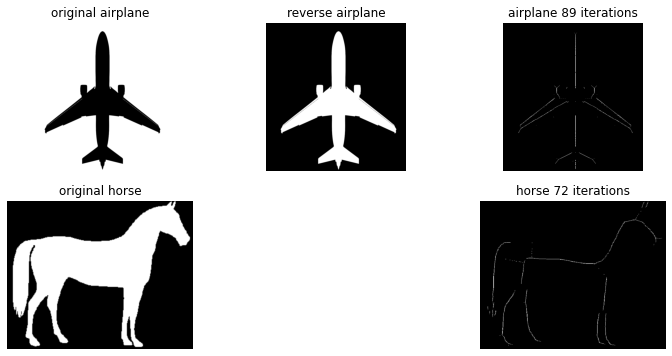

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_with_matplotlib_gray(img, title):
  plt.title(title)
  plt.axis('off')
  plt.imshow(img, cmap='gray')
  
airplane = cv2.imread(image_path_airplane, cv2.IMREAD_GRAYSCALE)
horse = cv2.imread(image_path_horse, cv2.IMREAD_GRAYSCALE)

img_airplane = cv2.bitwise_not(airplane)

ret, air = cv2.threshold(img_airplane, 128, 255, cv2.THRESH_BINARY)
ret2, hor = cv2.threshold(horse, 128, 255, cv2.THRESH_BINARY)
skel_airplane = np.zeros(img_airplane.shape, np.uint8)
skel_horse = np.zeros(horse.shape, np.uint8)

air_b = cv2.getStructuringElement(shape=cv2.MORPH_CROSS, ksize=(3, 3))
hor_b = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3, 3))

count_air, count_hor = 0, 0

def skeleton(A, B, skel, count):
  done = True
  while done:
    erode = cv2.erode(A, B)
    opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, B)
    tmp = cv2.subtract(erode, opening)
    skel = cv2.bitwise_or(skel, tmp)
    A = erode.copy()
    done = cv2.countNonZero(A) != 0

    count += 1

  return count, skel

air_result = skeleton(air, air_b, skel_airplane, count_air)
hor_result = skeleton(horse, hor_b, skel_horse, count_hor)

plt.figure(figsize=(12, 6))
plt.subplot(231)
show_with_matplotlib_gray(airplane, 'original airplane')
plt.subplot(232)
show_with_matplotlib_gray(img_airplane, 'reverse airplane')
plt.subplot(233)
show_with_matplotlib_gray(air_result[1], 'airplane {} iterations'.format(air_result[0]))
plt.subplot(234)
show_with_matplotlib_gray(horse, 'original horse')
plt.subplot(236)
show_with_matplotlib_gray(hor_result[1], 'horse {} iterations'.format(hor_result[0]))
plt.show()


## 문제 2

"2021-1 ImgProc JB-CH07-JHU2104-V1.pdf" 에서 저자 구현 코드와 opencv 함수를 이용하는 방법 둘 다 이용해서 예시를 보여주고 있습니다. 저자 구현 코드와 opencv 를 이용한 방법의 결과를 디스플레이하고, 두 결과를 픽셀 단위로 비교하여 몇 개의 픽셀이 다른 지 계산하고, 픽셀이 다른 경우, 다른 부분만을 영상을 만들어 디스플레이 하시오. 
- 필요한 이미지는 '../Dongkeun-OpenCV-ImgData' 에 복사하여 넣어서 수행
 
1. 예제 7.2.5 (소벨 엣지 검출)
2. 예제 7.2.6 (라플라시안 엣지 검출)
3. 예제 7.2.8 (캐니 엣지 검출)


1. 예제 7.2.5 (소벨 엣지 검출)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# matplot color display
def show_with_matplotlib(img, title):
  if img is None:
    print("show_with_matplotlib: Could not read the image.")
    return

  if img.shape[2] != 3:
    print()
    print("show_with_matplotlib: given image does not contains 3 channels")
    return

  # Convert BGR image to RGB:
  img_RGB = img[:, :, ::-1]

  # Show the image using matplotlib:
  plt.imshow(img_RGB)
  plt.title(title)
  plt.show()

# matplot grayscale display
def show_with_matplotlib_gray2(img, title):
  if img is None:
    print("show_with_matplotlib_gray: Could not read the image.")
    return

  if img.ndim > 2:
    print()
    print("show_with_matplotlib: given image has more than 2 dim")
    return

  plt.imshow(img, cmap="gray")
  plt.title(title)
  plt.show()

def show_with_matplotlib_MO4(color_img, title, pos, axis_show):
  # Convert BGR image to RGB
  img_RGB = color_img[:, :, ::-1]

  ax = plt.subplot(3, 6, pos)
  plt.imshow(img_RGB)
  plt.title(title)
  
  if not axis_show:
    plt.axis('off')

  plt.show

# image equivalence check
def test_same_image(img1, img2):
  result = True
  
  if img1.shape != img2.shape:
    print("img1.shape = ", img1.shape, " and img2.shape = ", img2.shape, ' are different') 
    result = False

  difference = cv2.subtract(img1, img2)
  #b, g, r = cv2.split(difference)
  if np.bitwise_xor(img1,img2).any() :
    print("img1 and img2 are not identical")
    result = False
  else :
    print("img1 and img2 are identical.O.K.")
  
  return result

def test_same_image_3ch(img1, img2):
  count_wrong = 0
  if img1 is None:
    print("test_same_image_3ch: img1 is None")

  if img2 is None:
    print("test_same_image_3ch: img2 is None")

  if img1.shape != img2.shape:
    print("img1.shape = ", img1.shape, " and img2.shape = ", img2.shape, ' are different') 
    return False

  where_wrong = np.zeros(img1.shape, np.uint8)

  for x in range(0, img1.shape[0]):
    for y in range(0, img1.shape[1]):
      if img1[x,y] != img2[x,y]:
        count_wrong = count_wrong + 1
        where_wrong[x, y] = (255)
        continue

  return count_wrong, where_wrong

# 회선 수행 함수
def filter(image, mask):

    rows, cols = image.shape[:2]
    dst = np.zeros((rows, cols), np.float32)                 # 회선 결과 저장 행렬
    xcenter, ycenter = mask.shape[1] // 2, mask.shape[0] // 2  # 마스크 중심 좌표

    for i in range(ycenter, rows - ycenter):                  # 입력 행렬 반복 순회
        for j in range(xcenter, cols - xcenter):
            y1, y2 = i - ycenter, i + ycenter + 1               # 관심영역 높이 범위
            x1, x2 = j - xcenter, j + xcenter + 1               # 관심영역 너비 범위

            roi = image[y1:y2, x1:x2].astype("float32")         # 관심영역 형변환
            tmp = cv2.multiply(roi, mask)                       # 회선 적용
            dst[i, j] = cv2.sumElems(tmp)[0]                    # 출력화소 저장

    return dst                     # 자료형 변환하여 반환

def differential(image, data1, data2):
    # 입력 인자로 마스크 행렬 초기화
    mask1 = np.array(data1, np.float32).reshape(3, 3)
    mask2 = np.array(data2, np.float32).reshape(3, 3)

    # 사용자 정의 회선 함수
    dst1 = filter(image, mask1)
    dst2 = filter(image, mask2)
    dst = cv2.magnitude(dst1, dst2);  # 회선 결과 두 행렬의 크기 계산

    # dst1, dst2 = np.abs(dst1), np.abs(dst2), 회선 결과 행렬 양수 변경
    dst = cv2.convertScaleAbs(dst)
    dst1 = cv2.convertScaleAbs(dst1)
    dst2 = cv2.convertScaleAbs(dst2)
    return dst, dst1, dst2

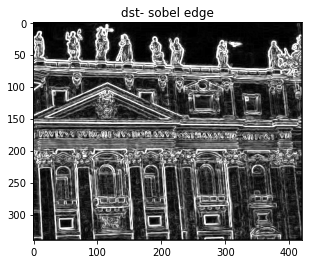

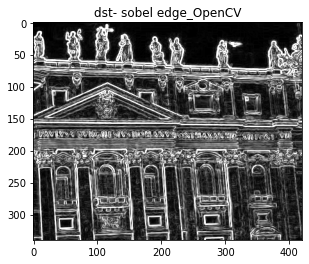

In [ ]:
image_sobel = cv2.imread('../Dongkeun-OpenCV-ImgData/edge.jpg', cv2.IMREAD_GRAYSCALE)
if image_sobel is None: raise Exception("영상파일 읽기 오류")
    
data1_sobel = [-1, 0, 1,                 # 수직 마스크
         -2, 0, 2,
         -1, 0, 1]
data2_sobel = [-1,-2,-1,                 # 수평 마스크
          0, 0, 0,
          1, 2, 1]
dst_sobel, dst1_sobel, dst2_sobel = differential(image_sobel, data1_sobel, data2_sobel)     # 두 방향 회선 및 크기(에지 강도) 계산

# OpenCV 제공 소벨 edge 계산
dst3_sobel = cv2.Sobel(np.float32(image_sobel), cv2.CV_32F, 1, 0, 3)  # x방향 미분 - 수직 마스크
dst4_sobel = cv2.Sobel(np.float32(image_sobel), cv2.CV_32F, 0, 1, 3)  # y방향 미분 - 수평 마스크
dst_sobel_openCV = cv2.magnitude(dst3_sobel, dst4_sobel)
dst_sobel_openCV = cv2.convertScaleAbs(dst_sobel_openCV)                # 절댓값 및 uint8 형변환

show_with_matplotlib_gray2(dst_sobel, "dst- sobel edge")
show_with_matplotlib_gray2(dst_sobel_openCV, "dst- sobel edge_OpenCV")

img1 and img2 are not identical
count wrong pixel 1235


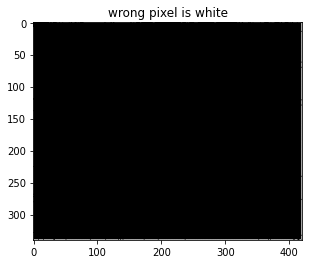

In [ ]:
# 두 영상의 다른 부분 검사
sobel_test = test_same_image(dst_sobel, dst_sobel_openCV)
count_sobel_wrong, where_sobel_wrong = test_same_image_3ch(dst_sobel, dst_sobel_openCV)
print("count wrong pixel", count_sobel_wrong)
if(count_sobel_wrong):
  show_with_matplotlib_gray2(where_sobel_wrong, "wrong pixel is white")

2. 예제 7.2.6 (라플라시안 엣지 검출)


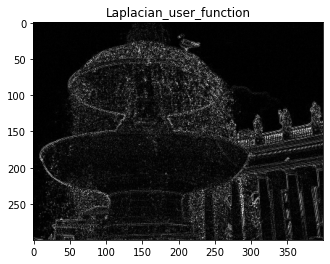

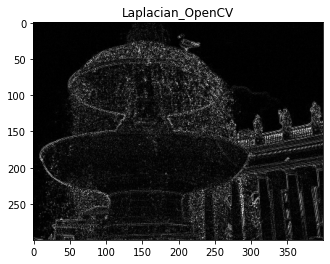

In [ ]:
image_lapl = cv2.imread('../Dongkeun-OpenCV-ImgData/laplacian.jpg', cv2.IMREAD_GRAYSCALE)
if image_lapl is None: raise Exception("영상파일 읽기 오류")

data1_lapl = [[0, 1, 0],                                      # 방향 필터
         [1, -4, 1],
         [0, 1, 0]]

mask4_lapl = np.array(data1_lapl, np.int16) 

# OpenCV 함수 cv2.filter2D() 통한 라플라시안 수행
dst_lapl = cv2.filter2D(image_lapl, cv2.CV_16S, mask4_lapl)
dst_lapl_openCV = cv2.Laplacian(image_lapl, cv2.CV_16S, 1)      # OpenCV 라플라시안 수행 함수

show_with_matplotlib_gray2(cv2.convertScaleAbs(dst_lapl), "Laplacian_user_function")
show_with_matplotlib_gray2(cv2.convertScaleAbs(dst_lapl_openCV), "Laplacian_OpenCV")

In [ ]:
# 두 영상의 다른 부분 검사
laplacian_test = test_same_image(dst_lapl, dst_lapl_openCV)
count_lapl_wrong, where_lapl_wrong = test_same_image_3ch(dst_lapl, dst_lapl_openCV)
print("count wrong pixel", count_lapl_wrong)
if (count_lapl_wrong):
  show_with_matplotlib_gray2(where_lapl_wrong, "wrong pixel is white")

img1 and img2 are identical.O.K.
count wrong pixel 0


3. 예제 7.2.8 (캐니 엣지 검출)

In [ ]:
def nonmax_suppression(sobel, direct):
    rows, cols = sobel.shape[:2]
    dst = np.zeros((rows, cols), np.float32)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # 행렬 처리를 통해 이웃 화소 가져오기
            values = sobel[i-1:i+2, j-1:j+2].flatten()
            first = [3, 0, 1, 2]
            id = first[direct[i, j]]
            v1, v2 = values[id], values[8-id]

            dst[i, j] = sobel[i, j] if (v1 < sobel[i , j] > v2) else 0
    return dst

def trace(max_sobel, i, j, low):
    h, w = max_sobel.shape
    if (0 <= i < h and 0 <= j < w) == False: return  # 추적 화소 범위 확인
    if pos_ck[i, j] == 0 and max_sobel[i, j] > low:
        pos_ck[i, j] = 255
        canny[i, j] = 255

        trace(max_sobel, i - 1, j - 1, low)   # 추적 함수 재귀 호출 - 8방향 추적
        trace(max_sobel, i    , j - 1, low)
        trace(max_sobel, i + 1, j - 1, low)
        trace(max_sobel, i - 1, j    , low)
        trace(max_sobel, i + 1, j    , low)
        trace(max_sobel, i - 1, j + 1, low)
        trace(max_sobel, i    , j + 1, low)
        trace(max_sobel, i + 1, j + 1, low)

def hysteresis_th(max_sobel, low, high):  # 이력 임계값 수행
    rows, cols = max_sobel.shape[:2]
    for i in range(1, rows - 1):  # 에지 영상 순회
        for j in range(1, cols - 1):
            if max_sobel[i, j] > high:  trace(max_sobel, i, j, low)  # 추적 시작

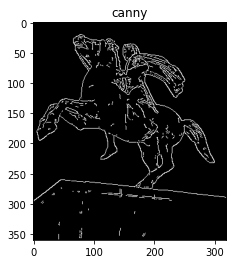

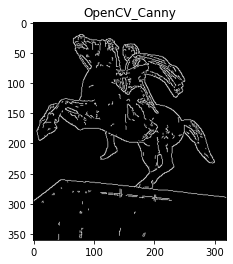

In [ ]:
image_canny = cv2.imread('../Dongkeun-OpenCV-ImgData/canny.jpg', cv2.IMREAD_GRAYSCALE)
if image_canny is None: raise Exception("영상 파일 읽기 오류")

pos_ck = np.zeros(image_canny.shape[:2], np.uint8)
canny = np.zeros(image_canny.shape[:2], np.uint8)

# 사용자 정의 캐니 에지
gaus_img = cv2.GaussianBlur(image_canny, (5, 5), 0.3)
Gx = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 1, 0, 3)  # x방향 마스크
Gy = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 0, 1, 3)  # y방향 마스크
sobel = np.fabs(Gx) + np.fabs(Gy)  # 두 행렬 절댓값 덧셈

directs = cv2.phase(Gx, Gy) / (np.pi / 4)
directs = directs.astype(int) % 4
max_sobel = nonmax_suppression(sobel, directs)   # 비최대치 억제
hysteresis_th(max_sobel, 100, 150)  # 이력 임계값

canny_openCV = cv2.Canny(image_canny, 100, 150)  # OpenCV 캐니 에지

show_with_matplotlib_gray2(canny, 'canny')   # 사용자 정의 캐니
show_with_matplotlib_gray2(canny_openCV, 'OpenCV_Canny')  # OpenCV 캐니 에지

img1 and img2 are not identical
count wrong pixel 1096


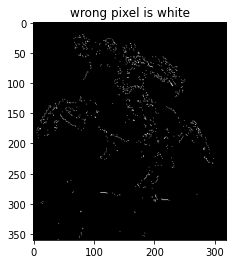

In [ ]:
# 두 영상의 다른 부분 검사
canny_test = test_same_image(canny, canny_openCV)
count_canny_wrong, where_canny_wrong = test_same_image_3ch(canny, canny_openCV)
print("count wrong pixel", count_canny_wrong)
if (count_canny_wrong):
  show_with_matplotlib_gray2(where_canny_wrong, "wrong pixel is white")